In [1]:
%reload_ext autoreload

%autoreload 2

In [6]:
#template_file = "../../test_data/unit_tests/protein_normalization/example_proteins.tsv"

template_dda = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
template_dia = "../../test_data/system_tests/iq_spectronaut_example_file/DIA-report-long-format.txt.spectronaut_fragion_isotopes_filtered_iq.aq_reformat.tsv"


samplenumbers_to_check = [10, 100, 1000]

/Users/constantin/workspace/directlfq/directlfq/utils.py:583: DeprecationWarning: invalid escape sequence \(
  pattern = "(.*)(\(mTRAQ-n-.\))(.*)"
/Users/constantin/workspace/directlfq/directlfq/utils.py:729: DeprecationWarning: invalid escape sequence \.
  matched = re.match("(.*)(\..*\.)(aq_reformat\.tsv)",input_file)


### Learning tests

In [7]:
import directlfq.benchmarking as lfq_benchmark

timed_dda = lfq_benchmark.LFQTimer(template_dda, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DDA")
timed_dia = lfq_benchmark.LFQTimer(template_dia, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DIA")


to few values for normalization without missing values. Including missing values
prot 100 of 4363
prot 200 of 4363
prot 300 of 4363
prot 400 of 4363
prot 500 of 4363
prot 600 of 4363
prot 700 of 4363
prot 800 of 4363
prot 900 of 4363
prot 1000 of 4363
prot 1100 of 4363
prot 1200 of 4363
prot 1300 of 4363
prot 1400 of 4363
prot 1500 of 4363
prot 1600 of 4363
prot 1700 of 4363
prot 1800 of 4363
prot 1900 of 4363
prot 2000 of 4363
prot 2100 of 4363
prot 2200 of 4363
prot 2300 of 4363
prot 2400 of 4363
prot 2500 of 4363
prot 2600 of 4363
prot 2700 of 4363
prot 2800 of 4363
prot 2900 of 4363
prot 3000 of 4363
prot 3100 of 4363
prot 3200 of 4363
prot 3300 of 4363
prot 3400 of 4363
prot 3500 of 4363
prot 3600 of 4363
prot 3700 of 4363
prot 3800 of 4363
prot 3900 of 4363
prot 4000 of 4363
prot 4100 of 4363
prot 4200 of 4363
prot 4300 of 4363


In [8]:
#MaxQuant Runtimes
import pandas as pd


timedrun_6samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(),"maxLFQ")
timedrun_6samples.num_samples =10
timedrun_6samples.runtime_info.overall_runtime = 1

timedrun_1000samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(), "maxLFQ")
timedrun_1000samples.num_samples = 1000
timedrun_1000samples.runtime_info.overall_runtime = 13112+1320

timed_mq_runs = [timedrun_6samples, timedrun_1000samples]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_44296/580820803.py", line 5, in <cell line: 5>
    timedrun_6samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(),"maxLFQ")
  File "/Users/constantin/workspace/directlfq/directlfq/benchmarking.py", line 471, in __init__
    self._run_from_formatted_df()
  File "/Users/constantin/workspace/directlfq/directlfq/benchmarking.py", line 475, in _run_from_formatted_df
    input_df_normed = lfqnorm.NormalizationManagerSamples(self._formatted_df, num_samples_quadratic=100).complete_dataframe
  File "/Users/constantin/workspace/directlfq/directlfq/normalization.py", line 300, in __init__
    self._run_normalization()
  File "/Users/constantin/workspace/directlfq/directlfq/normalization.py", line 256, in _r

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

class RuntimePlotter():
    def __init__(self, list_of_timed_runs , ax):
        self._ax = ax
        self._list_of_timed_runs = list_of_timed_runs
        self._plot_runtimes()
    
    def _plot_runtimes(self):
        x_values = [x.num_samples for x in self._list_of_timed_runs]
        y_values = [x.runtime_info.overall_runtime for x in self._list_of_timed_runs]
        hue = [x.name for x in self._list_of_timed_runs]
        sns.barplot(x = x_values, y = y_values, hue = hue, ax=self._ax)
        #self._ax.set_yscale("log")
        self._ax.set(xlabel="Number Proteomes", ylabel="Runtime")


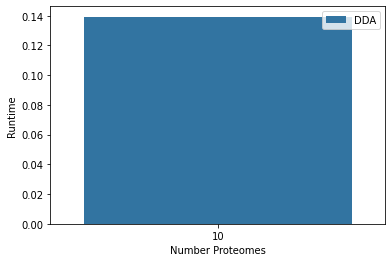

In [11]:
import matplotlib.pyplot as plt

ax = plt.subplot()
all_runs = timed_dda.timed_lfq_runs + timed_dia.timed_lfq_runs #timed_mq_runs
print(all_runs)
RuntimePlotter(all_runs, ax)